In [33]:
#在Jupyter中，使用matplotlib显示图像需要设置为inline模式，否则不会显示图像
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## 首先，生成输入数据
#### 我们需要构造满足这个函数的x和y同时加入一些不满足方程的噪声

In [34]:
# 设置随机数种子
np.random.seed(5)

# 直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间

x_data = np.linspace(-1,1,100)

# y=2x+1 +噪声 其中噪声的维度与x_data一致

y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

##### numpy.random.randn(d0,d1,..,dn)是从标准正态分布中返回一个或多个样本值
##### 标准正态分布又称u分布，是以0为均值，以1为标准差的正态分布，记为N(0,1)

In [35]:
np.random.randn(10)

array([ 0.79242262,  0.17076445, -1.75374086,  0.63029648,  0.49832921,
        1.01813761, -0.84646862,  2.52080763, -1.23238611,  0.72695326])

In [36]:
# x_data.shape值为一个元组

x_data.shape

(100,)

#### 实参的前面加上*和**时，就意味着拆包，单个*表示将元组拆成一个个单独的实参

In [37]:
np.random.randn(*x_data.shape)

array([ 0.04595522, -0.48713265,  0.81613236, -0.28143012, -2.33562182,
       -1.16727845,  0.45765807,  2.23796561, -1.4812592 , -0.01694532,
        1.45073354,  0.60687032, -0.37562084, -1.42192455, -1.7811513 ,
       -0.74790579, -0.36840953, -2.24911813, -1.69367504,  0.30364847,
       -0.40899234, -0.75483059, -0.40751917, -0.81262476,  0.92751621,
        1.63995407,  2.07361553,  0.70979786,  0.74715259,  1.46309548,
        1.73844881,  1.46520488,  1.21228341, -0.6346525 , -1.5996985 ,
        0.87715281, -0.09383245, -0.05567103, -0.88942073, -1.30095145,
        1.40216662,  0.46510099, -1.06503262,  0.39042061,  0.30560017,
        0.52184949,  2.23327081, -0.0347021 , -1.27962318,  0.03654264,
       -0.64635659,  0.54856784,  0.21054246,  0.34650175, -0.56705117,
        0.41367881, -0.51025606,  0.51725935, -0.30100513, -1.11840643,
        0.49852362, -0.70609387,  1.4438811 ,  0.44295626,  0.46770521,
        0.10134479, -0.05935198, -2.38669774,  1.22217056, -0.81

In [38]:
# 本例中 np.random.randn(*x_data.shape)和np.random.randn(100)功能相同
np.random.randn(100)

array([-1.02957349, -1.33628031, -0.61056736,  0.52469426, -0.34930813,
       -0.44073846, -1.1212876 ,  1.47284473, -0.62337224, -1.08070195,
       -0.12253009, -0.8077431 , -0.23255622,  1.33515034, -0.44645673,
       -0.04978868, -0.36854478, -0.19173957,  0.81967992,  0.53163372,
       -0.34161504, -0.93090048, -0.13421699,  0.83259361, -0.01735327,
       -0.12765822, -1.80791662,  0.99396898, -1.49112886, -1.28210748,
       -0.37570741,  0.03464388,  0.04507816, -0.76374689, -0.31313851,
       -0.60698954, -1.80955123, -0.25551774, -0.69379935,  0.41919776,
       -0.14520019,  0.9638013 ,  0.69622199,  0.89940546,  1.20837807,
        0.6932537 , -0.16636061,  1.35311311, -0.92862651, -0.03547249,
        0.85964595, -0.28749661,  0.71494995, -0.8034526 , -0.54048196,
        0.54617743,  0.71188926,  1.19715449, -0.07006703,  0.29822712,
        0.62619261,  0.46743206, -1.30262143, -0.57008965,  1.44295001,
       -1.24399513,  0.62888033, -0.42559213,  1.00320956, -0.77

### 利用matplotlib绘图

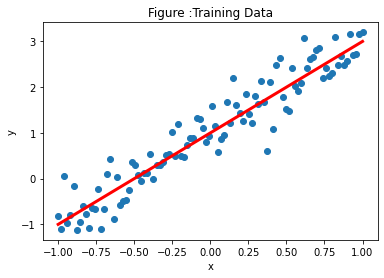

In [39]:
#画出随机生成的散点图

plt.scatter(x_data,y_data)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure :Training Data")

# 画出我们想要通过学习得到的目标线性函数
plt.plot(x_data,2*x_data+1.0,color='red',linewidth=3)

## 构建模型

#### 构建回归模型

In [40]:
def model(x,w,b):
    return tf.multiply(x,w) + b

#### 创建待优化变量
##### tensorflow变量的声明函数是tf.Variable

In [41]:
# 构建线性函数的斜率，变量w
w = tf.Variable(1.0,tf.float32)

# 构建线性函数的截距，变量b
b = tf.Variable(0.0,tf.float32)

## 定义损失函数
#### 损失函数用于描述预测值与真实值之间的误差，从而指导模型收敛方向
#### 常见损失函数：均方差（Mean Square Error,MSE）和交叉熵（cross-entropy）

In [42]:
# 采用均方差作为损失函数

def loss(x,y,w,b):
    err = model(x,w,b) - y   #计算模型预测值和标签值的差异
    squared_err = tf.square(err)  #求平方，得出方差
    return tf.reduce_mean(squared_err)  #求均值,得出均方差

## 训练模型
### 设置训练超参数

In [43]:
training_epochs = 10  # 迭代次数(训练轮数)
learning_rate = 0.01  # 学习率

### 定义计算梯度函数

In [44]:
# 计算样本数据[x,y]在参数[w,b]点上的梯度
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_ = loss(x,y,w,b)
    return tape.gradient(loss_,[w,b])   # 返回梯度向量

#### 在TensorFlow 2 中。使用tf.GradientTape()这一上下文管理器封装需要求导的计算步骤

## 执行训练(SGD)

In [1]:
step = 0  #记录训练的步数
loss_list = []  #用于保存loss值的列表
display_step = 10 # 控制训练过程数据显示的频率，不是超参数

for epoch in range(training_epochs):
    for xs,ys in zip(x_data,y_data):
        
        loss_ = loss(xs,ys,w, b)   #计算损失
        loss_list.append(loss_)    #保存本次损失计算结果
        
        delta_w,delta_b = grad(xs,ys,w,b)   #计算当前[w,b]点的梯度
        change_w = delta_w * learning_rate  #计算变量w需要改变的量
        change_b = delta_b * learning_rate  #计算变量b需要改变的量
        w.assign_sub(change_w)              #变量w值变更为减去change_w后的值
        b.assign_sub(change_b)              #变量b值变更为减去change_w后的值
        
        step = step+1                       #训练步数加一
        if step % display_step==0:          #显示训练过程
            print("Training Epoch:",'%02d'%(epoch+1),"Step: %03d"%(step))
    plt.plot(x_data,w.numpy() * x_data + b.numpy())    # 完成一轮训练后，画出图像

NameError: name 'training_epochs' is not defined

#### 显示训练结果

In [46]:
print("w:",w.numpy())
print("b:",b.numpy())

w: 1.9908317
b: 1.0366321


### 结果可视化

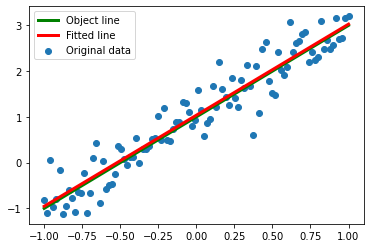

In [47]:
plt.scatter(x_data,y_data,label='Original data')
plt.plot(x_data,x_data * 2.0+1.0,label='Object line',color='g',linewidth=3)
plt.plot(x_data,x_data * w.numpy()+b.numpy(),label='Fitted line',color='r',linewidth=3)
plt.legend(loc=2)             #通过参数loc指定图例位置

### 进行预测

In [48]:
x_test = 3.21

predict = model(x_test,w.numpy(),b.numpy())
print("预测值:%f"%predict)

target = 2*x_test +1.0
print("目标值：%f"%target)

预测值:7.427202
目标值：7.420000


### 损失变化情况

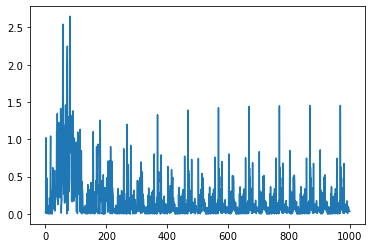

In [49]:
plt.plot(loss_list)